# Les Réseaux de Neurones Artificiels (Artificial Neural Networks)

Les réseaux de neurones artificiels (ANN) en Machine Learning sont particulièrement performants pour traiter des problèmes complexes tels que la classification, la régression et la reconnaissance d'images. 

Dans ce Notebook nous allons en créer un dans un objectif de Classification binaire

Un ANN est inspiré par les réseaux neuronaux biologiques qui constituent les cerveaux animaux.

## Anatomie de base d'un ANN

Un ANN typique est composé de 3 types de couches :

1. **Couche d'Entrée (Input Layer)** :

Représente les données d'entrée. Chaque neurone dans cette couche correspond à une caractéristique distincte de l'ensemble de données.

2. **Couches Cachées (Hidden Layers)** : 

Entre les couches d'entrée et de sortie, ces couches effectuent la majorité des calculs nécessaires via des poids et des biais. Elles ne sont pas visibles en dehors du modèle (d'où le terme "cachées").

3. **Couche de Sortie (Output Layer)** : 

La sortie du réseau. Le format de cette couche varie selon le type de tâche - par exemple, un neurone pour la régression, ou plusieurs neurones pour la classification multiclasse.

## Fonctionnement d'un ANN

Chaque neurone dans un ANN reçoit des entrées, les multiplie par des poids, les additionne, y ajoute un biais et enfin applique une fonction d'activation. La fonction d'activation introduit des non-linéarités dans le modèle, permettant au réseau d'apprendre des relations complexes entre les caractéristiques d'entrée et les sorties.


## Réseaux de Neurones Feed-Forward (FFNN)

Un réseau de neurones feed-forward est un type d'ANN où les connexions entre les neurones ne forment pas de boucles. Dans un FFNN, l'information se déplace seulement dans une direction - en avant - à travers les couches d'entrée, puis cachées, et finalement la couche de sortie.

### Caractéristiques des FFNN :

- **Pas de cycles ou de boucles** : Les FFNN n'ont pas de cycles ou de boucles dans leurs connexions, ce qui les distingue des réseaux de neurones récurrents (RNN).

- **Architecture en couches** : Les neurones sont organisés en couches et chaque neurone d'une couche est connecté à tous les neurones de la couche suivante.

- **Diversité des fonctions d'activation** : Les fonctions d'activation telles que ReLU (Rectified Linear Unit) ou sigmoïde sont appliquées à chaque neurone pour introduire des non-linéarités dans le modèle.

Dans le contexte de ce projet, nous utiliserons un FFNN pour classer les patients en fonction de leur risque de diabète. Ce modèle est choisi pour sa capacité à établir des relations complexes entre les caractéristiques et la probabilité de présence du diabète.


# Feed-Forward Neural Network for Diabetes Classification

Dans ce Notebook, nous allons développer un modèle de réseau de neurones feed-forward (FFNN) pour classer les patients diabétiques en utilisant le jeu de données diabetes.csv . Nous suivrons les étapes suivantes pour construire et évaluer notre modèle.


#### Importation de la base et des Packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/Users/adriencasse/Desktop/Projet_ML_diabete/diabetes.csv'
diabetes_data = pd.read_csv(file_path, delimiter=';')

##### Première lignes 

In [15]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Statistiques descriptives

In [16]:
# Statistiques descriptives

diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


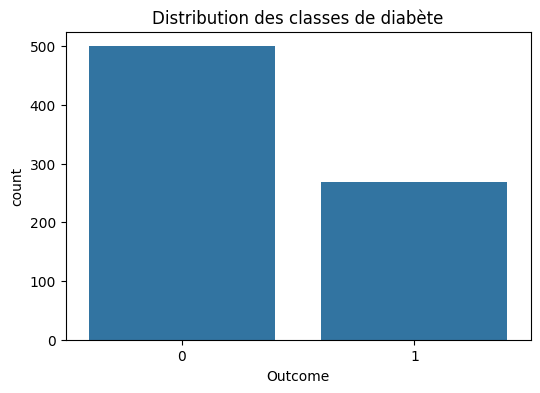

In [17]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_data)
plt.title('Distribution des classes de diabète')
plt.show()


La base de données sur le diabète a les caractéristiques suivantes :

- Nombre de caractéristiques (variables indépendantes) : 8

- Nombre total d'observations : 768

- Variables indépendantes : Grossesses, Glucose, Pression Artérielle, Épaisseur de la Peau, Insuline, Indice de Masse Corporelle (BMI), Fonction de Prédiction du Diabète, Âge.

- Variable dépendante (cible) : Résultat (diagnostique du diabète).

Pour chaque caractéristique, il semble y avoir une plage de valeurs assez large, ce qui indique que nous devrions normaliser ou standardiser les données avant de les utiliser dans un réseau de neurones artificiel (ANN). 

In [18]:

# Séparation des caractéristiques et de la variable cible

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Normalisation des données

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Conversion des étiquettes en one-hot encoding (dans l'idée ou on utilise la fonction d'activation 'softmax')

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [19]:
# Construction du modèle FFNN

model = Sequential()

# Première couche cachée avec 12 neurones, activation 'relu'

model.add(Dense(12, input_dim=8, activation='relu')) 

# Deuxième couche cachée avec 8 neurones, activation 'relu'

model.add(Dense(8, activation='relu'))

# Couche de sortie avec 2 neurones (pour chaque classe), activation 'softmax'

model.add(Dense(2, activation='softmax'))

# Compilation du modèle avec la fonction de perte categorical_crossentropy

# C'est ce qu'il faut utiliser sachant qu'on utilise softmax au lieu de sigmoid 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Résumé du modèle

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230 (920.00 Byte)
Trainable params: 230 (920.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Résumé du Modèle FFNN pour Classification Binaire avec Softmax :

Ce modèle séquentiel est conçu pour la classification binaire, utilisant une architecture feed-forward.

Il comprend une entrée de 8 caractéristiques, deux couches cachées avec des fonctions d'activation ReLU pour la non-linéarité,
et une couche de sortie avec l'activation softmax pour fournir des probabilités de classe.

La compilation du modèle utilise la perte de crossentropie catégorielle adaptée aux problèmes de classification,
avec l'optimiseur Adam pour une convergence efficace, et la précision comme métrique pour le suivi de la performance.




- **Activation ReLU** : La fonction d'activation ReLU est utilisée dans les couches cachées car elle est efficace et réduit le risque de disparition du gradient, un problème courant dans les réseaux de neurones profonds.

- **Couche de Sortie avec Softmax** : Bien que notre problème soit binaire, l'utilisation de deux neurones en sortie avec l'activation softmax offre une perspective probabiliste. Chaque neurone représente la probabilité d'appartenir à l'une des deux classes (diabétique ou non-diabétique), fournissant une sortie plus interprétable.


## Choix du Modèle et Fonction de Perte

Pour notre problème de classification du diabète, nous avons opté pour un modèle de réseau de neurones feed-forward avec deux neurones dans la couche de sortie et l'utilisation de la fonction d'activation `softmax`. Bien que notre cas soit une classification binaire, cette approche nous permet d'obtenir une représentation probabiliste des deux classes possibles.

### Pourquoi Utiliser Softmax dans un Contexte Binaire ?

- **Représentation Probabiliste** : `Softmax` convertit les sorties du modèle en probabilités pour chaque classe. Dans notre cas, bien qu'il n'y ait que deux classes (diabétique ou non-diabétique), utiliser `softmax` nous donne une probabilité claire pour chacune d'elles. Cela peut fournir des insights supplémentaires, comme la confiance du modèle dans ses prédictions.

- **Adaptabilité** : Cette configuration rend le modèle facilement adaptable pour des classifications multiclasses, au cas où le problème serait étendu à l'avenir.

### Fonction de Perte `categorical_crossentropy`

Pour un modèle avec une sortie `softmax`, nous utilisons la `categorical_crossentropy` comme fonction de perte. Elle est conçue pour des problèmes de classification multiclasse, mais convient également aux problèmes binaires avec une sortie `softmax`. 

La `categorical_crossentropy` mesure l'erreur entre les distributions de probabilités réelles (étiquettes réelles) et celles prédites par le modèle. La formule mathématique est :

$$ L(y, \hat{y}) = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic}) $$

où :
-  $N$ est le nombre total d'observations.
- $C$ est le nombre de classes (2 dans notre cas).
- $Y_{ic}$ est la vérité terrain pour l'observation $i$ et la classe $c$, généralement sous forme d'encodage one-hot.
- $\hat{Y}_{ic}$ est la probabilité prédite par le modèle pour l'observation $i$ d'appartenir à la classe $c$.

Cette fonction de perte est efficace pour des problèmes où les sorties peuvent être interprétées comme des probabilités, car elle pénalise les prédictions qui s'écartent de la vérité terrain.


In [20]:
# Entraînement du modèle

history = model.fit(X_train, y_train_one_hot, epochs=150, batch_size=10, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test

loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Précision sur le test : {accuracy:.2f}')



Epoch 1/150


50/50 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7006 - val_loss: 0.5702 - val_accuracy: 0.7154
Epoch 2/150
50/50 [==============================] - 0s 704us/step - loss: 0.5350 - accuracy: 0.7332 - val_loss: 0.5426 - val_accuracy: 0.7317
Epoch 3/150
50/50 [==============================] - 0s 608us/step - loss: 0.5067 - accuracy: 0.7515 - val_loss: 0.5193 - val_accuracy: 0.7642
Epoch 4/150
50/50 [==============================] - 0s 625us/step - loss: 0.4891 - accuracy: 0.7515 - val_loss: 0.5089 - val_accuracy: 0.7642
Epoch 5/150
50/50 [==============================] - 0s 599us/step - loss: 0.4787 - accuracy: 0.7678 - val_loss: 0.4952 - val_accuracy: 0.7724
Epoch 6/150
50/50 [==============================] - 0s 606us/step - loss: 0.4684 - accuracy: 0.7780 - val_loss: 0.4902 - val_accuracy: 0.7805
Epoch 7/150
50/50 [==============================] - 0s 594us/step - loss: 0.4606 - accuracy: 0.7800 - val_loss: 0.4863 - val_accuracy: 0.7724
Epoch 8/150
5

In [21]:
print(loss)

0.6906114816665649


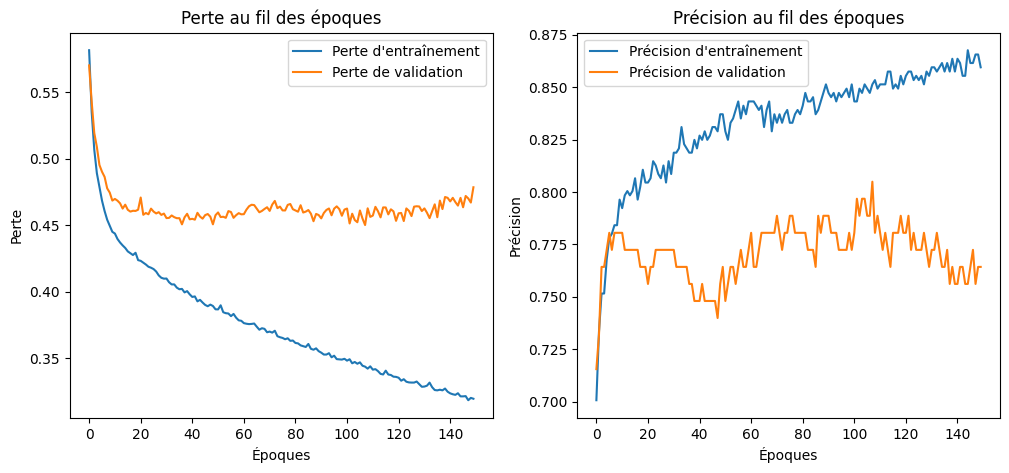

In [22]:
# Affichage des courbes d'apprentissage pour la perte et la précision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


## Construction de la matrice de confusion

5/5 [==============================] - 0s 539us/step


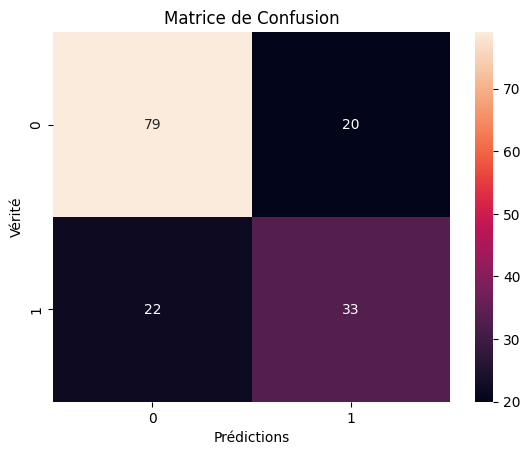

                precision    recall  f1-score   support

Non-Diabétique       0.78      0.80      0.79        99
    Diabétique       0.62      0.60      0.61        55

      accuracy                           0.73       154
     macro avg       0.70      0.70      0.70       154
  weighted avg       0.73      0.73      0.73       154



In [23]:

# Prédiction de Probabilités (proba diabétiques vs Proba non diabétiques)

y_pred_probs = model.predict(X_test)

# Récupération des classes prédites

y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Affichage de la matrice de confusion

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité')
plt.show()

# Affichage du rapport de classification

print(classification_report(y_true_classes, y_pred_classes, target_names=['Non-Diabétique', 'Diabétique']))

In [24]:
y_pred_probs

array([[8.46349239e-01, 1.53650776e-01],
       [9.53866243e-01, 4.61337306e-02],
       [9.41762984e-01, 5.82369752e-02],
       [7.84739077e-01, 2.15260953e-01],
       [6.48517549e-01, 3.51482451e-01],
       [9.80590343e-01, 1.94096547e-02],
       [9.97020543e-01, 2.97942315e-03],
       [9.11380827e-01, 8.86192098e-02],
       [1.21032752e-01, 8.78967285e-01],
       [7.22139060e-01, 2.77860910e-01],
       [9.45555568e-01, 5.44444174e-02],
       [1.26917079e-01, 8.73082936e-01],
       [8.42899919e-01, 1.57100141e-01],
       [4.86621886e-01, 5.13378143e-01],
       [9.48507428e-01, 5.14926165e-02],
       [4.06204253e-01, 5.93795836e-01],
       [8.75842452e-01, 1.24157563e-01],
       [9.64759529e-01, 3.52405198e-02],
       [9.33813453e-01, 6.61865696e-02],
       [1.64913043e-01, 8.35086942e-01],
       [9.23571110e-01, 7.64289200e-02],
       [9.95564342e-01, 4.43571899e-03],
       [8.53309631e-01, 1.46690339e-01],
       [9.84056711e-01, 1.59433056e-02],
       [3.096313

### Propagation Avant

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fonctions nécessaires pour le réseau de neurones

def relu(x):
    """Fonction d'activation ReLU."""
    return np.maximum(0, x)

def softmax(x):
    """Fonction d'activation Softmax pour la couche de sortie."""
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def categorical_crossentropy(y_true, y_pred):
    """Fonction de perte d'entropie croisée catégorique."""
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]

def forward_pass(X, weights):
    """Forward pass du réseau de neurones."""
    layer1 = relu(np.dot(X, weights['W1']) + weights['b1'])
    output = softmax(np.dot(layer1, weights['W2']) + weights['b2'])
    return output, layer1


X = diabetes_data.drop('Outcome', axis=1).values  # Caractéristiques d'entrée
y = diabetes_data['Outcome'].values  # Étiquettes de sortie


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train_one_hot = np.eye(2)[y_train]

# Initialisation des poids

np.random.seed(42)  # Pour la reproductibilité
weights = {
    'W1': np.random.rand(8, 12),  # 8 caractéristiques d'entrée, 12 neurones dans la première couche cachée
    'b1': np.zeros(12),
    'W2': np.random.rand(12, 2),  # 12 neurones dans la première couche cachée, 2 neurones de sortie (pour softmax)
    'b2': np.zeros(2)
}

# Exécuter le forward pass

y_pred, _ = forward_pass(X_train, weights)

# Calcul de la perte

loss = categorical_crossentropy(y_train_one_hot, y_pred)
print(f'Categorical Crossentropy Loss = {loss}')


Categorical Crossentropy Loss = 0.7982870139874617


## Propagation Avant : Forward Pass, qu'est-ce que c'est ?

La propagation avant dans un réseau de neurones est l'opération fondamentale qui permet de transformer des données brutes en prédictions utiles. Cette transformation se fait en plusieurs étapes, chacune ayant sa propre signification mathématique.

### Combinaison Linéaire des Entrées

La première étape dans un neurone de la couche cachée est de calculer une combinaison linéaire des entrées  $\mathbf{x}$  avec les poids  $\mathbf{W}$  et le biais  $\mathbf{b}$ :

$$ a = \mathbf{Wx} + \mathbf{b} $$

où :
-  $a$ est la sortie pré-activation du neurone,
-  $\mathbf{W}$  est une matrice de poids,
-  $\mathbf{x}$  est un vecteur d'entrée,
-  $\mathbf{b}$  est un vecteur de biais.

### Activation ReLU

Ensuite, nous appliquons la fonction d'activation ReLU, définie par :

$$ ReLU(z) = \max(0, z) $$

La fonction ReLU est choisie pour ses propriétés qui aident à réduire le problème de disparition du gradient et à accélérer la convergence pendant l'apprentissage.

### Sortie Softmax

Dans la couche de sortie, pour un problème de classification binaire, nous utilisons la fonction Softmax. Elle est définie pour un vecteur  z  par :

$$ Softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}} $$

où :

- $z_i$ est la sortie pré-activation pour la classe $i$,
- $C$ est le nombre total de classes (2 dans notre cas de classification binaire),
- $e$ est la base du logarithme naturel.

Softmax normalise les scores de sortie en une distribution de probabilités, où la somme des probabilités pour toutes les classes est égale à 1.

### Fonction de Perte d'Entropie Croisée Catégorique

La performance du modèle est évaluée à l'aide de la fonction de perte d'entropie croisée catégorique, qui pour les étiquettes réelles  $\mathbf{y}$ et les prédictions  $\hat{\mathbf{y}}$  est donnée par :

$$ L(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(\hat{y}_{ic}) $$

où :
- $N$ est le nombre total d'observations,
- $C$ est le nombre de classes,
- $y_{ic}$ est la vérité terrain pour l'observation i  et la classe c ,
- $hat{y}_{ic}$ est la probabilité prédite par le modèle pour l'observation i d'appartenir à la classe c .

Cette fonction de perte est particulièrement adaptée aux problèmes de classification où la sortie peut être interprétée comme une probabilité. Elle est efficace car elle pénalise les prédictions qui sont confiantes mais incorrectes, forçant ainsi le modèle à être à la fois précis et certain dans ses prédictions.




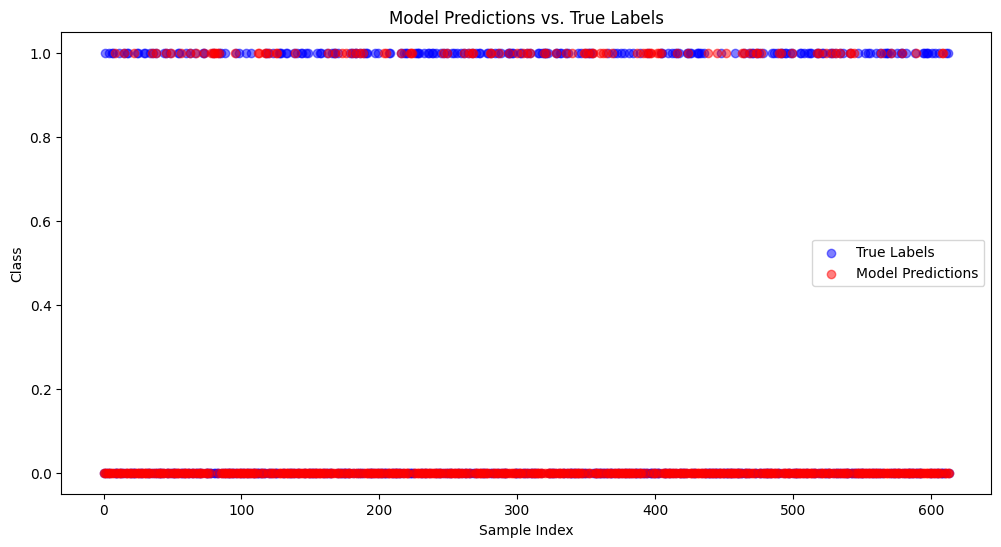

In [26]:
# Visualisation de la prédiction vs les vraies étiquettes


plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_train)), np.argmax(y_train_one_hot, axis=1), color='blue', label='True Labels', alpha=0.5)
plt.scatter(range(len(y_train)), np.argmax(y_pred, axis=1), color='red', label='Model Predictions', alpha=0.5)
plt.title('Model Predictions vs. True Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.show()




### Rôle Crucial de la Backpropagation

Après la propagation avant, la backpropagation est utilisée pour ajuster les poids $\mathbf{W}$  et les biais $\mathbf{b}$  en fonction des gradients de la perte. Cet ajustement se fait par la descente de gradient, où les poids sont mis à jour comme suit :

$$ w_{new} = w_{old} - \eta \frac{\partial L}{\partial w_{old}} $$

où $\eta$ est le taux d'apprentissage, qui détermine la taille des pas effectués dans l'espace des paramètres pour minimiser la fonction de perte.